<a href="https://colab.research.google.com/github/ISHAAN-KKR/google-collab/blob/main/sbin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


Load the CSV file of Your Desired Stock, here in this case I'm using SBIN stock data from NSE's website.

In [75]:
df = pd.read_csv('tataelxi.csv')

In [76]:
df.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,21-Jun-2024,EQ,"7,260.00","7,357.95","7,077.10","7,230.55","7,133.80","7,120.60","7,209.26","9,200.00","6,411.20","1,73,733","1,25,24,86,620.40","27,064"
1,20-Jun-2024,EQ,"7,244.05","7,269.85","7,192.10","7,244.80","7,220.50","7,230.55","7,222.52","9,200.00","6,411.20","68,329","49,35,07,596.70","11,058"
2,19-Jun-2024,EQ,"7,290.00","7,316.65","7,202.80","7,289.70","7,248.00","7,244.80","7,243.04","9,200.00","6,411.20","58,610","42,45,14,753.15","10,121"
3,18-Jun-2024,EQ,"7,327.25","7,362.50","7,275.00","7,268.00","7,290.00","7,289.70","7,303.69","9,200.00","6,411.20","94,020","68,66,93,001.25","17,264"
4,14-Jun-2024,EQ,"7,260.00","7,375.00","7,201.90","7,231.05","7,270.00","7,268.00","7,284.02","9,200.00","6,411.20","1,68,944","1,23,05,92,015.00","23,089"


In [77]:
df.columns

Index(['Date ', 'series ', 'OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'ltp ',
       'close ', 'vwap ', '52W H ', '52W L ', 'VOLUME ', 'VALUE ',
       'No of trades '],
      dtype='object')

In [78]:
df= df.drop(columns=['series '])

In [79]:
df.columns

Index(['Date ', 'OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'ltp ', 'close ',
       'vwap ', '52W H ', '52W L ', 'VOLUME ', 'VALUE ', 'No of trades '],
      dtype='object')

In [94]:
#df.columns = df.columns.str.strip()

# Explicitly rename the columns to ensure there are no leading/trailing spaces
#df.rename(columns={'Date': 'Date', 'close': 'close'}, inplace=True)

# Print the cleaned columns to verify
#print("Columns after stripping spaces and renaming:", df.columns)

# Convert 'Date' column to datetime
#df['Date'] = pd.to_datetime(df['Date'])

# Sort the DataFrame by 'Date'
df.sort_values('Date', inplace=True)

# Set 'Date' as the index
#df.set_index('Date', inplace=True)

# Remove commas and convert the 'close' column to float
#df['close'] = df['close'].str.replace(',', '').astype(float)

# Extract the 'close' column and reshape it for scaling
#data = df['close'].values.reshape(-1, 1)

# Initialize the MinMaxScaler
#scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the 'close' column data
# = scaler.fit_transform(data)

#print("Scaled data:", scaled_data)

In [80]:
df.columns = df.columns.str.strip()

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort the DataFrame by 'Date'
df.sort_values('Date', inplace=True)

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Remove commas and convert the 'close' column to float
df['close'] = df['close'].str.replace(',', '').astype(float)

# Extract the 'close' column and reshape it for scaling
data = df['close'].values.reshape(-1, 1)

# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the 'close' column data
scaled_data = scaler.fit_transform(data)

In [39]:

#df['Date '] = pd.to_datetime(df['Date '])

#df.sort_values('Date ', inplace=True)

#df.set_index('Date ', inplace=True)

#data = df['close '].values.reshape(-1, 1)

In [99]:
#scaler = MinMaxScaler(feature_range=(0, 1))
#scaled_data = scaler.fit_transform(data)

In [81]:
train_data_len = int(len(scaled_data) * 0.8)

train_data = scaled_data[:train_data_len]
test_data = scaled_data[train_data_len:]

def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(max(0, len(data) - time_step - 1)):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 20

X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [82]:
train_data_len = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_data_len]
test_data = scaled_data[train_data_len:]

def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(max(0, len(data) - time_step - 1)):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 2  # Set time_step to a smaller value for the small dataset

X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train shape before reshaping:", X_train.shape)
print("X_test shape before reshaping:", X_test.shape)

# Reshape X_train and X_test if they have data
if X_train.size != 0:
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

if X_test.size != 0:
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print("X_train shape after reshaping:", X_train.shape)
print("X_test shape after reshaping:", X_test.shape)

X_train shape before reshaping: (195, 2)
X_test shape before reshaping: (47, 2)
X_train shape after reshaping: (195, 2, 1)
X_test shape after reshaping: (47, 2, 1)


In [83]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=25))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

epochs = 50
batch_size = 32
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=1)


Epoch 1/50
7/7 [==============================] - 12s 455ms/step - loss: 0.2145 - val_loss: 0.0175
Epoch 2/50
7/7 [==============================] - 0s 23ms/step - loss: 0.1324 - val_loss: 0.0062
Epoch 3/50
7/7 [==============================] - 0s 24ms/step - loss: 0.0595 - val_loss: 0.0492
Epoch 4/50
7/7 [==============================] - 0s 22ms/step - loss: 0.0427 - val_loss: 0.0943
Epoch 5/50
7/7 [==============================] - 0s 21ms/step - loss: 0.0403 - val_loss: 0.0462
Epoch 6/50
7/7 [==============================] - 0s 22ms/step - loss: 0.0329 - val_loss: 0.0273
Epoch 7/50
7/7 [==============================] - 0s 25ms/step - loss: 0.0330 - val_loss: 0.0303
Epoch 8/50
7/7 [==============================] - 0s 24ms/step - loss: 0.0254 - val_loss: 0.0501
Epoch 9/50
7/7 [==============================] - 0s 26ms/step - loss: 0.0229 - val_loss: 0.0306
Epoch 10/50
7/7 [==============================] - 0s 25ms/step - loss: 0.0169 - val_loss: 0.0159
Epoch 11/50
7/7 [==========

In [54]:
# Example adjustments
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.3))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=100))
model.add(Dropout(0.3))
model.add(Dense(units=50))
model.add(Dense(units=1))

model.compile(optimizer='rmsprop', loss='mean_squared_error')

epochs = 100
batch_size = 64
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=1)


Epoch 1/100
1/1 [==============================] - 11s 11s/step - loss: 0.3534 - val_loss: 0.0160
Epoch 2/100
1/1 [==============================] - 0s 69ms/step - loss: 0.2995 - val_loss: 0.0090
Epoch 3/100
1/1 [==============================] - 0s 74ms/step - loss: 0.2602 - val_loss: 0.0052
Epoch 4/100
1/1 [==============================] - 0s 71ms/step - loss: 0.2263 - val_loss: 0.0047
Epoch 5/100
1/1 [==============================] - 0s 67ms/step - loss: 0.1941 - val_loss: 0.0078
Epoch 6/100
1/1 [==============================] - 0s 73ms/step - loss: 0.1620 - val_loss: 0.0152
Epoch 7/100
1/1 [==============================] - 0s 73ms/step - loss: 0.1325 - val_loss: 0.0271
Epoch 8/100
1/1 [==============================] - 0s 85ms/step - loss: 0.1111 - val_loss: 0.0428
Epoch 9/100
1/1 [==============================] - 0s 73ms/step - loss: 0.0946 - val_loss: 0.0596
Epoch 10/100
1/1 [==============================] - 0s 72ms/step - loss: 0.0822 - val_loss: 0.0764
Epoch 11/100
1/1 [=

Epoch 84/100
1/1 [==============================] - 0s 70ms/step - loss: 0.0167 - val_loss: 0.0093
Epoch 85/100
1/1 [==============================] - 0s 76ms/step - loss: 0.0207 - val_loss: 0.0103
Epoch 86/100
1/1 [==============================] - 0s 74ms/step - loss: 0.0210 - val_loss: 0.0102
Epoch 87/100
1/1 [==============================] - 0s 69ms/step - loss: 0.0207 - val_loss: 0.0097
Epoch 88/100
1/1 [==============================] - 0s 63ms/step - loss: 0.0190 - val_loss: 0.0090
Epoch 89/100
1/1 [==============================] - 0s 101ms/step - loss: 0.0211 - val_loss: 0.0092
Epoch 90/100
1/1 [==============================] - 0s 88ms/step - loss: 0.0152 - val_loss: 0.0089
Epoch 91/100
1/1 [==============================] - 0s 73ms/step - loss: 0.0171 - val_loss: 0.0093
Epoch 92/100
1/1 [==============================] - 0s 73ms/step - loss: 0.0172 - val_loss: 0.0089
Epoch 93/100
1/1 [==============================] - 0s 77ms/step - loss: 0.0204 - val_loss: 0.0098
Epoch 94/

2/2 [==============================] - 0s 9ms/step
Train RMSE: 707.0310760711378
Test RMSE: 259.13645899730903


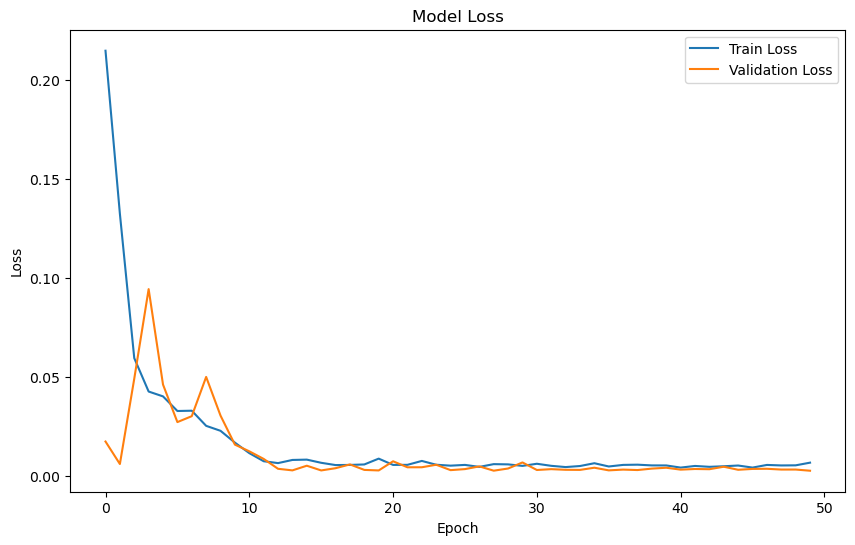

In [84]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

train_rmse = np.sqrt(np.mean((train_predict - scaler.inverse_transform([y_train]))**2))
test_rmse = np.sqrt(np.mean((test_predict - scaler.inverse_transform([y_test]))**2))
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


In [86]:
len(valid)

4

C:\Users\Lord Sen\AppData\Local\Temp\ipykernel_27828\4178808171.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = test_predict


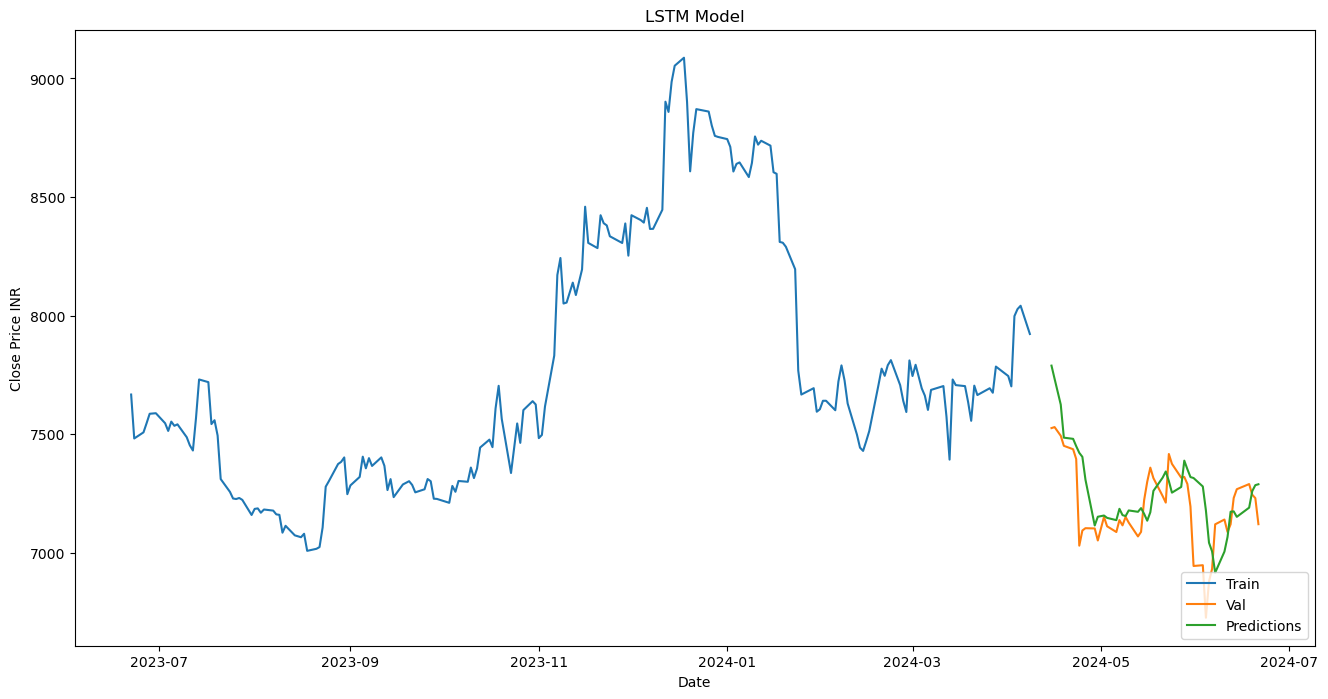

In [87]:
train = df[:train_data_len]
valid = df[train_data_len + time_step+1 :]
valid['Predictions'] = test_predict

plt.figure(figsize=(16,8))
plt.title('LSTM Model')
plt.xlabel('Date')
plt.ylabel('Close Price INR')
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


1/1 [==============================] - 0s 69ms/step


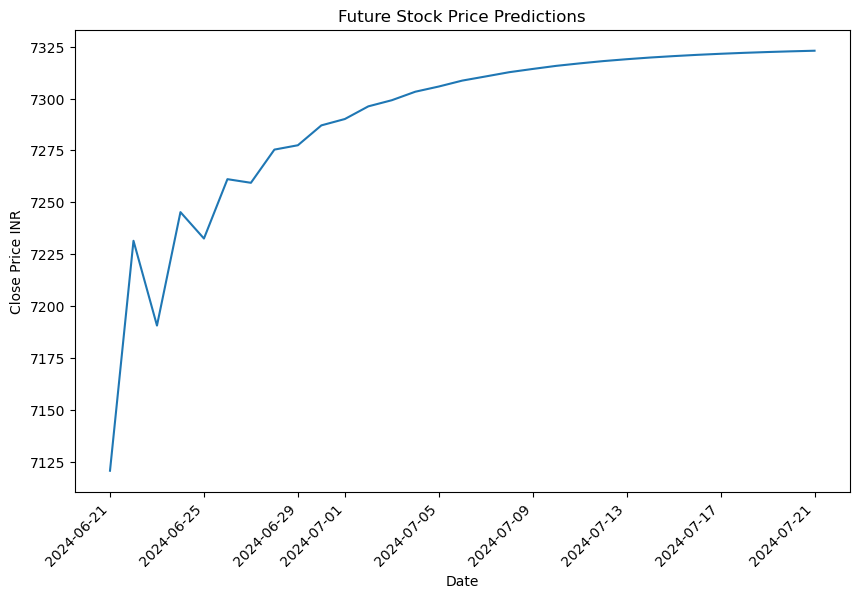

In [93]:
last_100_days = scaled_data[-time_step:]
X_future = [last_100_days]
X_future = np.array(X_future).reshape(1, -1, 1)

future_predictions = []
for _ in range(30):
    future_pred = model.predict(X_future)
    future_predictions.append(future_pred[0, 0])
    X_future = np.append(X_future[:, 1:, :], [future_pred], axis=1)

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

plt.figure(figsize=(10, 6))
plt.plot(pd.date_range(start=df.index[-1], periods=31), np.append(data[-1], future_predictions))
plt.title('Future Stock Price Predictions')
plt.xlabel('Date')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Close Price INR')
plt.show()
